In [2]:
pip install pandas

  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install numpy==1.21.6

   ---------------------------------------- 0.0/14.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.0 MB 1.7 MB/s eta 0:00:08
    --------------------------------------- 0.2/14.0 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.3/14.0 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.4/14.0 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.5/14.0 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.6/14.0 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.6/14.0 MB 1.8 MB/s eta 0:00:08
   -- ------------------------------------- 0.7/14.0 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/14.0 MB 1.9 MB/s eta 0:00:08
   -- ------------------------------------- 0.9/14.0 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/14.0 MB 1.9 MB/s eta 0:00:07
   --- ------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.9.0 requires numpy>=1.23, but you have numpy 1.21.6 which is incompatible.
pandas 2.2.2 requires numpy>=1.22.4; python_version < "3.11", but you have numpy 1.21.6 which is incompatible.


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
from PIL import Image

#warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for TensorFlow
import tensorflow as tf
import tensorflow_addons as tfa
from keras import models, layers
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications import ResNet50
from keras.applications import Xception
from keras.applications.vgg16 import preprocess_input

from sklearn.metrics import classification_report, confusion_matrix


print("Importing libraries completed.")

In [2]:
gpu = tf.config.list_physical_devices('GPU')
gpu

[]

In [6]:
# Check for available physical GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # If there are GPUs available, TensorFlow should automatically utilize them
    print("Available GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPU(s) available.")

No GPU(s) available.


In [19]:
data_dir = r"E:\Snapfolia - CS\Samples\splitted_dataClean"
train_dir = data_dir + r"\train"
valid_dir = data_dir + r"\validation" 

In [20]:
# acquiring a list of all class names
#class_names = os.listdir(train_dir)
print(class_names)

['Apitong', 'Balete', 'Bayabas', 'Guyabano', 'Kamagong', 'Langka', 'Mahogany', 'Mangga', 'Palo Maria']


In [21]:
IMAGE_SIZE = 224
HEIGHT = 300
WIDTH = 225
CHANNELS = 3
BATCH_SIZE = 32
EPOCHS = 50

n_classes = len(class_names)
n_classes

9

In [22]:
img_size = (HEIGHT, WIDTH)

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'
)

Found 3510 images belonging to 9 classes.
Found 1004 images belonging to 9 classes.


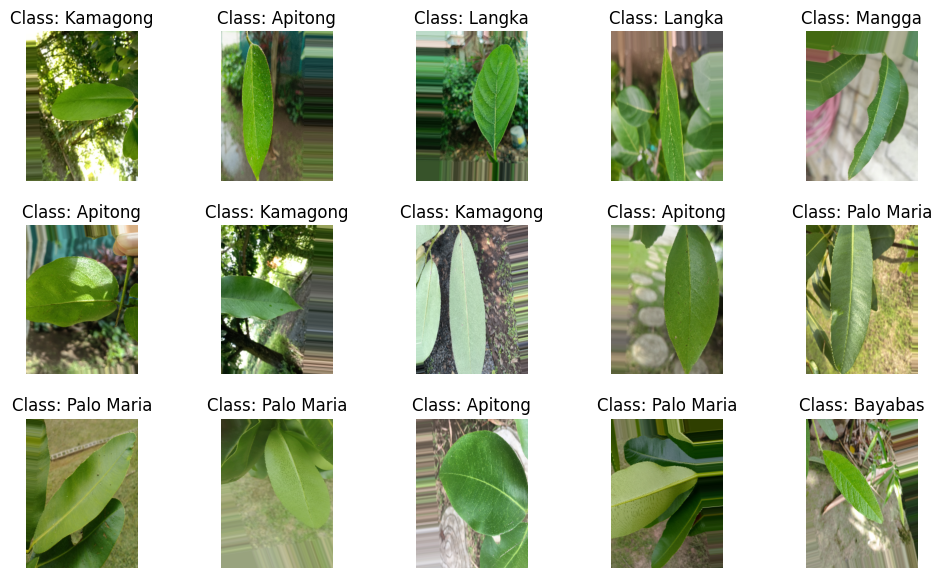

In [23]:
# Get the class indices and names from the train generator
class_indices = train_generator.class_indices
label_to_name = {idx: name for name, idx in class_indices.items()}
samples = train_generator.__next__()  # next fetches the image from the object. Each run gives a new set of images in the training set

images = samples[0]
target = samples[1]

plt.figure(figsize=(12, 12))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    
    # Get the class index from one-hot encoded target
    label_idx = tuple(target[i]).index(1)
    class_name = label_to_name[label_idx]
    
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.show()

In [24]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()
#ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=10)

# EarlyStopping callback to stop training if val_loss does not improve after n epochs
earlystop_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)

### VGG16

In [25]:
# VGG16
input_layer=layers.Input(shape=(HEIGHT,WIDTH,CHANNELS))

# # Create the VGG16 model with your modifications
# base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)

# # Add custom dense layers with dropout and L2 regularization
# x = base_model.output
# x = layers.Flatten()(x)
# x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
# x = layers.Dropout(0.3)(x)  # Add dropout
# x = layers.Dense(n_classes, activation='softmax')(x)

# model_vgg16 = models.Model(inputs=base_model.input, outputs=x)

model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
last_layer=model_vgg16.output
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(n_classes,activation='softmax')(flatten)
model_vgg16=models.Model(inputs=input_layer,outputs=output_layer)

print("We are making all the layers intrainable except the last layer. \n")
for layer in model_vgg16.layers[:-1]:
    layer.trainable=False

We are making all the layers intrainable except the last layer. 



In [26]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tfa.metrics.F1Score(num_classes=n_classes)]

CALLBACKS = [my_callback, rop_callback, earlystop_cb]

In [27]:
model_vgg16.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 225, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 225, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 225, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 56, 128)       0   

In [28]:
history_vgg = model_vgg16.fit(train_generator,batch_size=BATCH_SIZE,verbose=True,validation_data=test_generator, callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/50
110/110 [==============================] - 469s 4s/step - loss: 3.5013 - acc: 0.3370 - f1_score: 0.3354 - val_loss: 1.7588 - val_acc: 0.5428 - val_f1_score: 0.4807 - lr: 0.0010
Epoch 2/50
110/110 [==============================] - 328s 3s/step - loss: 1.9190 - acc: 0.5291 - f1_score: 0.5276 - val_loss: 1.7193 - val_acc: 0.5837 - val_f1_score: 0.5688 - lr: 0.0010
Epoch 3/50
110/110 [==============================] - 341s 3s/step - loss: 1.7466 - acc: 0.5823 - f1_score: 0.5806 - val_loss: 1.5449 - val_acc: 0.6614 - val_f1_score: 0.6454 - lr: 0.0010
Epoch 4/50
110/110 [==============================] - 363s 3s/step - loss: 1.4854 - acc: 0.6305 - f1_score: 0.6297 - val_loss: 0.9165 - val_acc: 0.7799 - val_f1_score: 0.7683 - lr: 0.0010
Epoch 5/50
110/110 [==============================] - 362s 3s/step - loss: 1.4226 - acc: 0.6490 - f1_score: 0.6485 - val_loss: 0.8123 - val_acc: 0.7849 - val_f1_score: 0.7858 - lr: 0.0010
Epoch 6/50
110/110 [==============================] - 373s 3

In [29]:
predictions = model_vgg16.predict(test_generator)

# Obtain the true labels from the test_generator
true_labels = test_generator.classes
 
# Generate the classification report
report = classification_report(true_labels, predictions.argmax(axis=1), target_names=class_names)
print(report)

32/32 [==============================] - 78s 2s/step
              precision    recall  f1-score   support

     Apitong       0.92      0.81      0.86       108
      Balete       0.88      0.97      0.92       117
     Bayabas       0.89      0.82      0.86       113
    Guyabano       0.83      0.83      0.83       107
    Kamagong       0.87      0.94      0.90       110
      Langka       0.80      0.90      0.85       113
    Mahogany       0.80      0.82      0.81       120
      Mangga       0.96      0.91      0.93       102
  Palo Maria       0.98      0.88      0.93       114

    accuracy                           0.88      1004
   macro avg       0.88      0.88      0.88      1004
weighted avg       0.88      0.88      0.88      1004



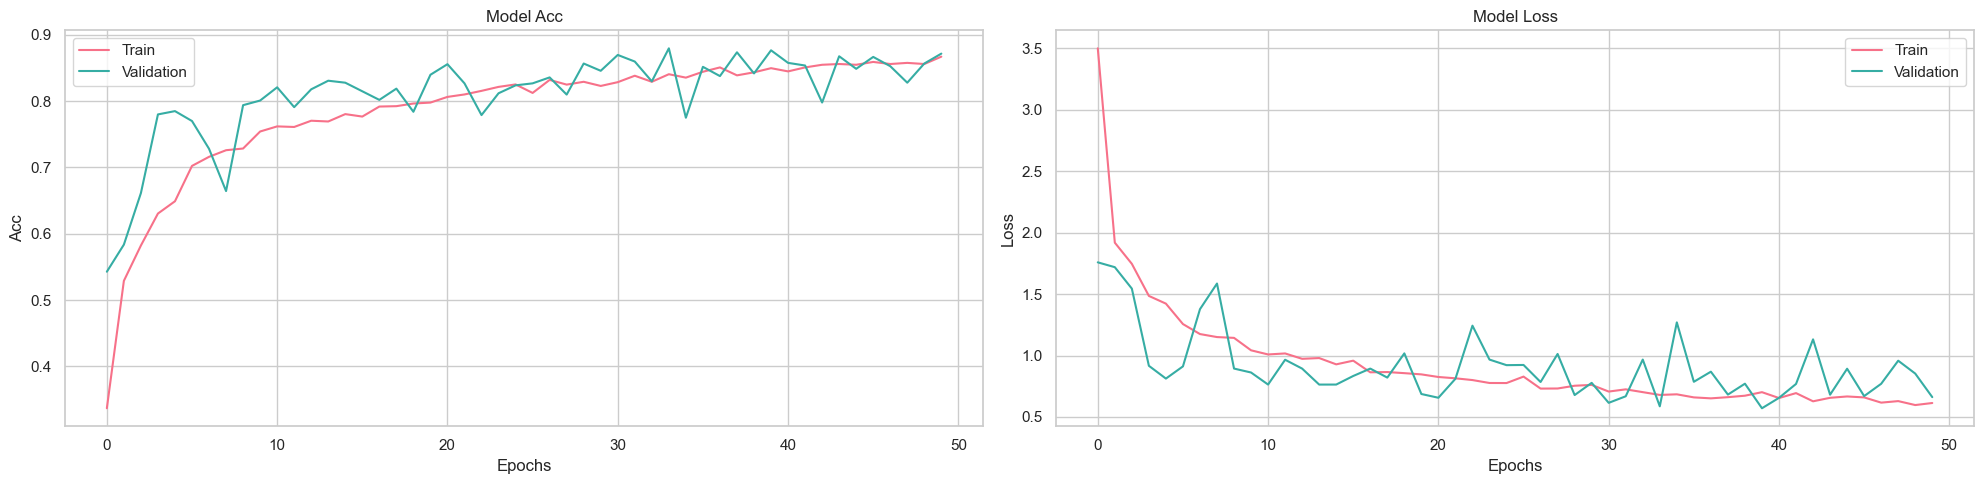

In [30]:
sns.set(style="whitegrid", rc={"axes.grid": True})

# Create a color palette
palette = sns.color_palette("husl", 2)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

# Loop through metrics
for i, metric in enumerate(["acc", "loss"]):
    sns.lineplot(x=history_vgg.epoch, y=history_vgg.history[metric], ax=ax[i], label="Train", color=palette[0])
    sns.lineplot(x=history_vgg.epoch, y=history_vgg.history["val_" + metric], ax=ax[i], label="Validation", color=palette[1])

    ax[i].set_title(f"Model {metric.capitalize()}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric.capitalize())

    ax[i].legend().set_visible(True)

plt.tight_layout()
# plt.savefig('../../server/vgg16/metrics/training')

plt.show()

model_path = '../../server/vgg16/artifacts/model.json'
model_json = model_vgg16.to_json()
with open(model_path, "w") as json_file:
  json_file.write(model_json)

# model_vgg16.save("vgg16_model.hdf5")

weights_path = '../../server/vgg16/artifacts/model_weights.hdf5'
model_vgg16.save_weights(weights_path)

In [34]:
model_path = r"E:\Leaflet (CNN)\server\vgg16\artifacts\model1.json"
model_json = model_vgg16.to_json()
with open(model_path, "w") as json_file:
  json_file.write(model_json)

model_vgg16.save("vgg16_model.hdf5")

weights_path = 'E:\Snapfolia - CS\snapfolia\model'
model_vgg16.save_weights(weights_path)

### Inception V3

In [17]:
model_inception=InceptionV3(weights='imagenet')
input_layer=layers.Input(shape=(HEIGHT,WIDTH,CHANNELS))
model_inception=InceptionV3(weights='imagenet',input_tensor=input_layer,include_top=False)
last_layer=model_inception.output
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(n_classes,activation='softmax')(flatten)
model_inception=models.Model(inputs=input_layer,outputs=output_layer)

print("We are making all the layers intrainable except the last layer. \n")
for layer in model_inception.layers[:-1]:
    layer.trainable=False

96112376/96112376 [==============================] - 51s 1us/step
We are making all the layers intrainable except the last layer. 



In [18]:
model_inception.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)
model_inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 300, 225, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 112, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 112, 32)         0         ['batch_normalization_94

In [19]:
history_inception = model_inception.fit(train_generator,batch_size=BATCH_SIZE,verbose=True,validation_data=test_generator, callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/50
8/8 [==============================] - 8s 761ms/step - loss: 27.4217 - acc: 0.5333 - f1_score: 0.5335 - val_loss: 12.5587 - val_acc: 0.3667 - val_f1_score: 0.2315 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - 6s 686ms/step - loss: 13.1610 - acc: 0.5292 - f1_score: 0.5284 - val_loss: 3.5017 - val_acc: 0.6833 - val_f1_score: 0.6577 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - 6s 762ms/step - loss: 4.8745 - acc: 0.7125 - f1_score: 0.7127 - val_loss: 0.5929 - val_acc: 0.9000 - val_f1_score: 0.8985 - lr: 0.0010
Epoch 4/50
8/8 [==============================] - 6s 722ms/step - loss: 3.9676 - acc: 0.7875 - f1_score: 0.7877 - val_loss: 1.8417 - val_acc: 0.8667 - val_f1_score: 0.8630 - lr: 0.0010
Epoch 5/50
8/8 [==============================] - 6s 738ms/step - loss: 0.9226 - acc: 0.9083 - f1_score: 0.9083 - val_loss: 0.4234 - val_acc: 0.9000 - val_f1_score: 0.9000 - lr: 0.0010
Epoch 6/50
8/8 [==============================] - 6s 691ms/step - loss: 

In [20]:
predictions = model_inception.predict(test_generator)

# Obtain the true labels from the test_generator
true_labels = test_generator.classes

# Generate the classification report
report = classification_report(true_labels, predictions.argmax(axis=1), target_names=class_names)
print(report)

2/2 [==============================] - 2s 466ms/step
              precision    recall  f1-score   support

        Ipil       1.00      0.95      0.97        20
      Kalios       0.95      0.90      0.92        20
    Kamagong       0.91      1.00      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



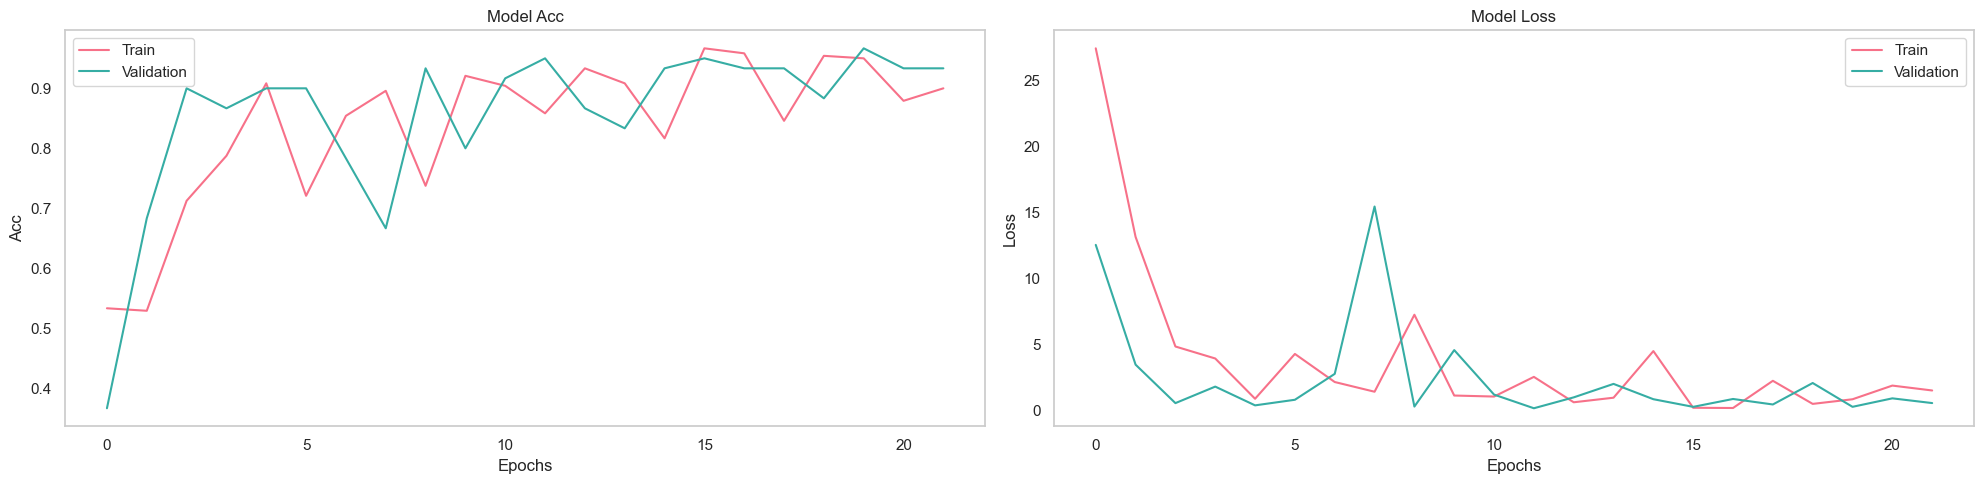

In [22]:
sns.set(style="whitegrid", rc={"axes.grid": False})

# Create a color palette
palette = sns.color_palette("husl", 2)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

# Loop through metrics
for i, metric in enumerate(["acc", "loss"]):
    sns.lineplot(x=history_inception.epoch, y=history_inception.history[metric], ax=ax[i], label="Train", color=palette[0])
    sns.lineplot(x=history_inception.epoch, y=history_inception.history["val_" + metric], ax=ax[i], label="Validation", color=palette[1])

    ax[i].set_title(f"Model {metric.capitalize()}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric.capitalize())

    ax[i].legend().set_visible(True)

plt.tight_layout()
# plt.savefig('../../server/inception/metrics/training')

plt.show()

In [ ]:
model_path = '../../server/artifacts/inception/model.json'
model_json = model_inception.to_json()
with open(model_path, "w") as json_file:
  json_file.write(model_json)

weights_path = '../../server/artifacts/inception/model_weights.hdf5'
model_inception.save_weights(weights_path)

### ResNet50

In [23]:
model_inception=ResNet50(weights='imagenet')
input_layer=layers.Input(shape=(HEIGHT,WIDTH,CHANNELS))
model_resnet=ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)
last_layer=model_resnet.output
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(n_classes,activation='softmax')(flatten)
model_resnet=models.Model(inputs=input_layer,outputs=output_layer)

print("We are making all the layers intrainable except the last layer. \n")
for layer in model_resnet.layers[:-1]:
    layer.trainable=False

102967424/102967424 [==============================] - 55s 1us/step
We are making all the layers intrainable except the last layer. 



In [24]:
model_resnet.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)
model_resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 300, 225, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 231, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 113, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 150, 113, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [25]:
history_resnet = model_resnet.fit(train_generator,batch_size=BATCH_SIZE,verbose=True,validation_data=test_generator, callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/50
8/8 [==============================] - 16s 2s/step - loss: 55.1122 - acc: 0.4433 - f1_score: 0.4407 - val_loss: 36.4604 - val_acc: 0.3333 - val_f1_score: 0.1667 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - 14s 2s/step - loss: 28.3702 - acc: 0.3542 - f1_score: 0.3514 - val_loss: 22.6914 - val_acc: 0.3333 - val_f1_score: 0.1667 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - 13s 2s/step - loss: 29.8069 - acc: 0.3250 - f1_score: 0.3153 - val_loss: 23.9248 - val_acc: 0.3333 - val_f1_score: 0.1667 - lr: 0.0010
Epoch 4/50
8/8 [==============================] - 12s 2s/step - loss: 23.0538 - acc: 0.3792 - f1_score: 0.3789 - val_loss: 20.7816 - val_acc: 0.3333 - val_f1_score: 0.1667 - lr: 0.0010
Epoch 5/50
8/8 [==============================] - 12s 1s/step - loss: 23.4755 - acc: 0.3917 - f1_score: 0.3892 - val_loss: 30.5917 - val_acc: 0.3333 - val_f1_score: 0.1667 - lr: 0.0010
Epoch 6/50
8/8 [==============================] - 11s 1s/step - loss: 26.80

KeyboardInterrupt: 

In [ ]:
predictions = model_resnet.predict(test_generator)

# Obtain the true labels from the test_generator
true_labels = test_generator.classes

# Generate the classification report
report = classification_report(true_labels, predictions.argmax(axis=1), target_names=class_names)
print(report)

12/12 [==============================] - 3s 116ms/step
              precision    recall  f1-score   support

    Balayong       1.00      1.00      1.00        40
     Bayabas       0.90      0.90      0.90        40
         Dao       0.92      0.88      0.90        40
        Dita       0.95      0.95      0.95        40
      Kalios       0.91      0.97      0.94        40
    Kamagong       0.93      0.93      0.93        40
     Mulawin       0.82      0.82      0.82        40
       Narra       0.95      0.90      0.92        40
    Sintores       0.88      0.90      0.89        40

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



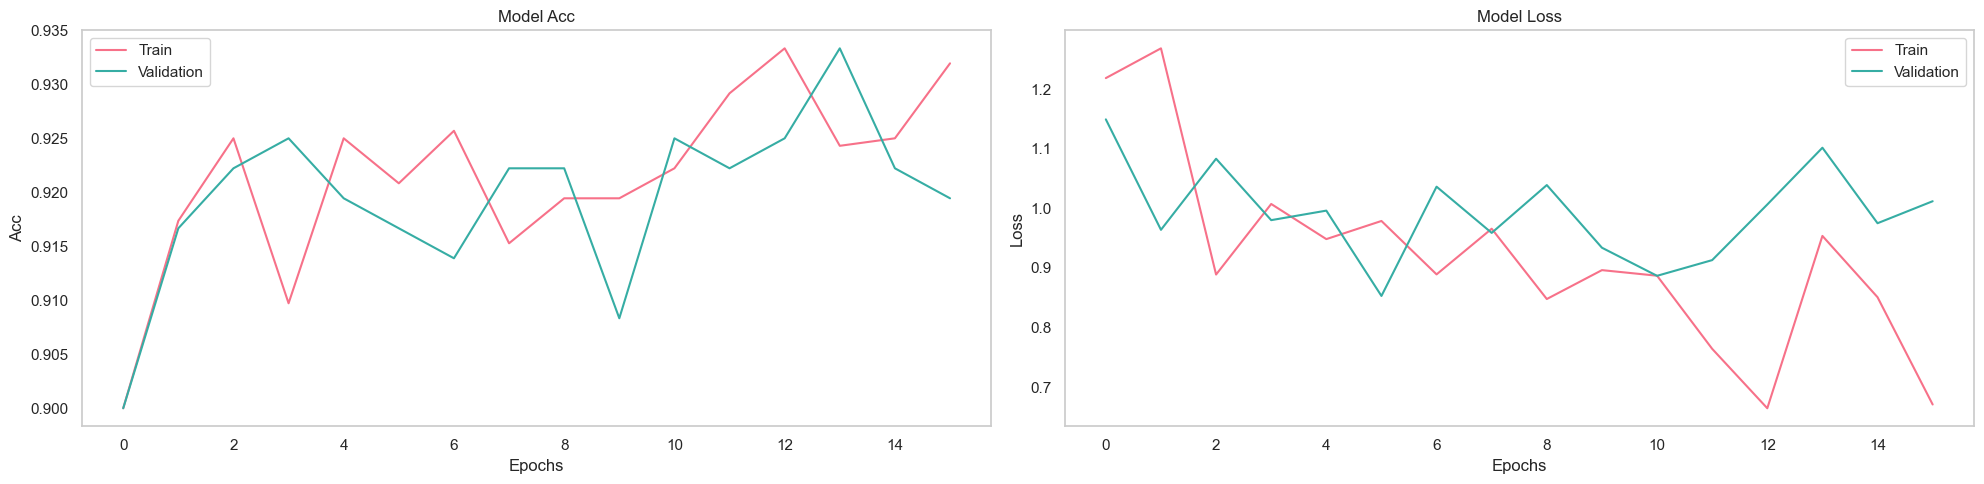

In [ ]:
sns.set(style="whitegrid", rc={"axes.grid": False})

# Create a color palette
palette = sns.color_palette("husl", 2)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

# Loop through metrics
for i, metric in enumerate(["acc", "loss"]):
    sns.lineplot(x=history_resnet.epoch, y=history_resnet.history[metric], ax=ax[i], label="Train", color=palette[0])
    sns.lineplot(x=history_resnet.epoch, y=history_resnet.history["val_" + metric], ax=ax[i], label="Validation", color=palette[1])

    ax[i].set_title(f"Model {metric.capitalize()}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric.capitalize())

    ax[i].legend().set_visible(True)

plt.tight_layout()
# plt.savefig('../../server/resnet50/metrics/training')

plt.show()

In [ ]:
model_path = '../../server/artifacts/resnet50/model.json'
model_json = model_resnet.to_json()
with open(model_path, "w") as json_file:
  json_file.write(model_json)

weights_path = '../../server/artifacts/resnet50/model_weights.hdf5'
model_resnet.save_weights(weights_path)

### Xception

In [ ]:
model_xception=Xception(weights='imagenet')
input_layer=layers.Input(shape=(HEIGHT,WIDTH,CHANNELS))
model_xception=Xception(weights='imagenet',input_tensor=input_layer,include_top=False)
last_layer=model_xception.output
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(n_classes,activation='softmax')(flatten)
model_xception=models.Model(inputs=input_layer,outputs=output_layer)

print("We are making all the layers intrainable except the last layer. \n")
for layer in model_xception.layers[:-1]:
    layer.trainable=False

We are making all the layers intrainable except the last layer. 



In [ ]:
model_xception.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)
model_xception.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 300, 225, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 112, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
history_xception = model_xception.fit(train_generator,batch_size=BATCH_SIZE,verbose=True,validation_data=test_generator, callbacks=CALLBACKS, epochs=EPOCHS)

Epoch 1/50
45/45 [==============================] - 29s 640ms/step - loss: 1.0020 - acc: 0.8917 - f1_score: 0.8908 - val_loss: 1.5523 - val_acc: 0.8861 - val_f1_score: 0.8860 - lr: 1.0000e-04
Epoch 2/50
45/45 [==============================] - 28s 630ms/step - loss: 0.7411 - acc: 0.9090 - f1_score: 0.9091 - val_loss: 1.5102 - val_acc: 0.8861 - val_f1_score: 0.8860 - lr: 1.0000e-04
Epoch 3/50
45/45 [==============================] - 29s 633ms/step - loss: 0.7288 - acc: 0.8972 - f1_score: 0.8972 - val_loss: 1.4360 - val_acc: 0.8861 - val_f1_score: 0.8861 - lr: 1.0000e-04
Epoch 4/50
45/45 [==============================] - 28s 628ms/step - loss: 0.8204 - acc: 0.9007 - f1_score: 0.9007 - val_loss: 1.3832 - val_acc: 0.8833 - val_f1_score: 0.8840 - lr: 1.0000e-04
Epoch 5/50
45/45 [==============================] - 28s 630ms/step - loss: 0.7518 - acc: 0.9028 - f1_score: 0.9028 - val_loss: 1.3919 - val_acc: 0.8833 - val_f1_score: 0.8832 - lr: 1.0000e-04
Epoch 6/50
45/45 [======================

In [ ]:
predictions = model_xception.predict(test_generator)

# Obtain the true labels from the test_generator
true_labels = test_generator.classes

# Generate the classification report
report = classification_report(true_labels, predictions.argmax(axis=1), target_names=class_names)
print(report)

12/12 [==============================] - 3s 186ms/step
              precision    recall  f1-score   support

    Balayong       0.90      0.95      0.93        40
     Bayabas       0.90      0.90      0.90        40
         Dao       1.00      0.93      0.96        40
        Dita       0.93      0.97      0.95        40
      Kalios       0.95      0.93      0.94        40
    Kamagong       0.86      0.93      0.89        40
     Mulawin       0.84      0.90      0.87        40
       Narra       0.90      0.90      0.90        40
    Sintores       0.94      0.80      0.86        40

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360



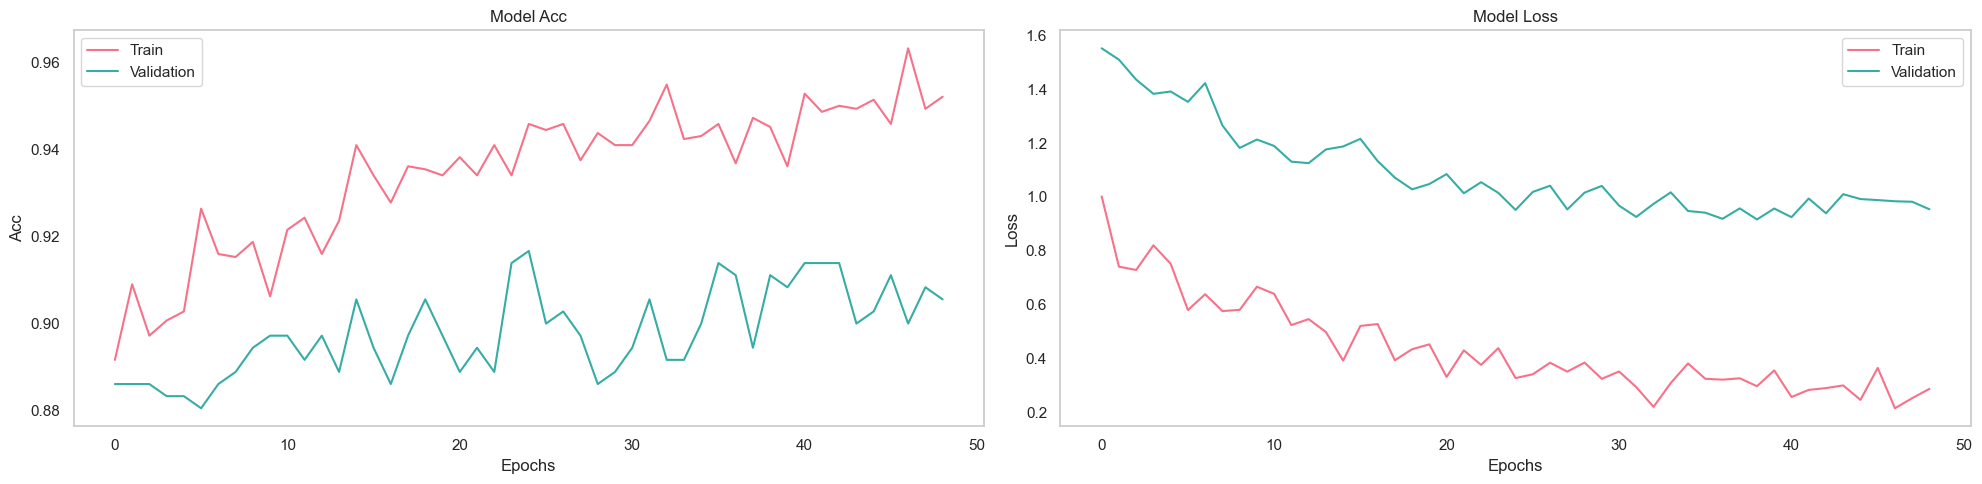

In [ ]:
sns.set(style="whitegrid", rc={"axes.grid": False})

# Create a color palette
palette = sns.color_palette("husl", 2)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

# Loop through metrics
for i, metric in enumerate(["acc", "loss"]):
    sns.lineplot(x=history_xception.epoch, y=history_xception.history[metric], ax=ax[i], label="Train", color=palette[0])
    sns.lineplot(x=history_xception.epoch, y=history_xception.history["val_" + metric], ax=ax[i], label="Validation", color=palette[1])

    ax[i].set_title(f"Model {metric.capitalize()}")
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric.capitalize())

    ax[i].legend().set_visible(True)

plt.tight_layout()
# plt.savefig('../../server/xception/metrics/training')

plt.show()

In [ ]:
model_path = '../../server/artifacts/xception/model.json'
model_json = model_xception.to_json()
with open(model_path, "w") as json_file:
  json_file.write(model_json)

weights_path = '../../server/artifacts/xception/model_weights.hdf5'
model_xception.save_weights(weights_path)